<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>

<div style="text-align: center;">
<font face="Times New Roman" size=5>
<div>In the name of LORD</div>
<br>
    <img src="https://github.com/MoeeinAali/Micromaster-ProgrammingForDataAnalysis-Winter2024-Assignment04/blob/97fdfd106cd557f3ea3e4354354f1c6357f9ff45/micromaster.png?raw=true" width=170 alt="micromaster_logo">
    <br>
<div dir=ltr align=center>
<font size=6>
    <b>Sharif Micromaster</b>
     <br>
<font  size=6>
   Programming For Data Analysis
  <br>
<font size=5>
    Assignment 4: Introduction to Matplotlib, Seaborn, Plotly 
</div>
</body>
</html>
<hr>

**Name:**

**Number:**

## Notebook Content
0. [Introduction](##Introduction)
1. [Importing libraries](##importing-libraries)
2. [Dataset Insight](##dataset-insight)
3. [Matplotlib](##matplotlib)
4. [Seaborn](##seaborn)
5. [Plotly](##plotly)

## Introduction
'Veda' is a Sanskrit word meaning knowledge, and words like video, visualization are derived from it. We gain knowledge about things by observing them, and one way to understand our data is to visualize it.


In this notebook, we aim to learn the fundamentals of data visualization using Python's most popular graphing libraries. We will explore different types of charts and their use cases. We will also learn how to work with the tools provided and how to adapt them to meet our own need


Feel free to ask if you have any questions: [Telegram](https://t.me/alephhNull). 

## Importing libraries
First of all import the following libraries (Make sure you have already downloaded them)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Dataset Insight

Load the `cardio.csv` file as a Pandas DataFrame and display the top 5 rows.

In [4]:
df_original = pd.read_csv('cardio.csv')
df_original.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,17290,2,172,77.0,120,70,2,2,0,0,0,1
1,19840,1,154,60.0,110,70,1,1,0,0,1,0
2,23247,1,160,65.0,110,70,3,3,0,0,1,0
3,21812,2,156,60.0,120,80,1,1,0,0,1,0
4,18689,1,155,72.0,170,100,2,2,0,0,1,1


Print the shape of the DataFrame and the names of the columns.

In [ ]:
print(df_original.shape)
print(df_original.columns)

(7000, 12)
Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


The column `age` represents the age of the patients in days. Convert it to years.

In [5]:
df = df_original.copy()
df['age'] = df_original['age'] / 365

## Matplotlib
Now, we will visually analyze our data using basic functions from Matplotlib.


Ensure that you use appropriate names for labels and titles in your plots throughout the rest of the notebook to keep them meaningful and clear.

### Question 1: Normal histograms
First, plot the distribution of patients' heights using a Matplotlib histogram with 50 bins.

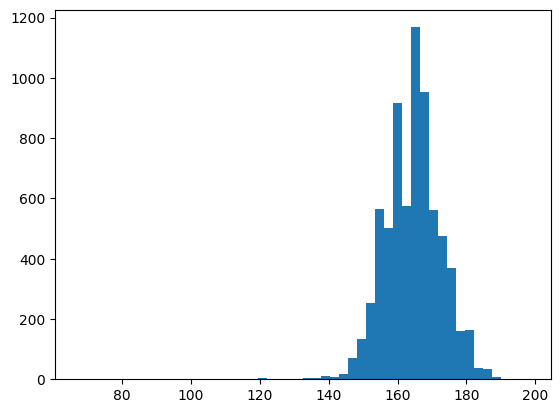

In [ ]:
plt.hist(df['height'], bins=50)
plt.show()

### Question 2: Tall bar charts
One way to ensure that a dataset is valid (and not just random numbers) is to use our own base knowledge about certain facts. For example, we know that people's heights follow a normal distribution, which we can also observe in the previous plot.


Sometimes it's more convenient to use bar plots to show distributions. Now, plot the histogram from the previous question using Matplotlib's bar chart for heights in the range of 175 to 190 cm (tall patients).

<BarContainer object of 14 artists>

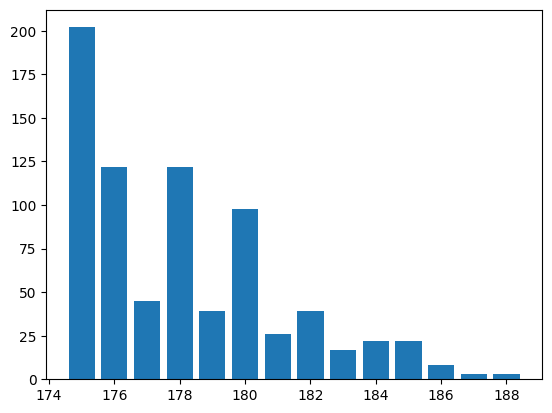

In [ ]:
heights = df.loc[(df['height'] >= 175) & (df['height'] < 190), 'height']
x_vals, y_vals = np.unique(heights, return_counts=True)
plt.bar(x_vals, y_vals)

### Question 3: Cumbersome Stacking

We also know that men are usually taller than women. Therefore, taller patients should consist of more men than women. Show the previous plot so that each bar displays the composition of men and women (gender 1 is for women and 2 is for men), and use a legend to indicate them.

**Hint:** Look up stacking bar charts in Matplotlib.

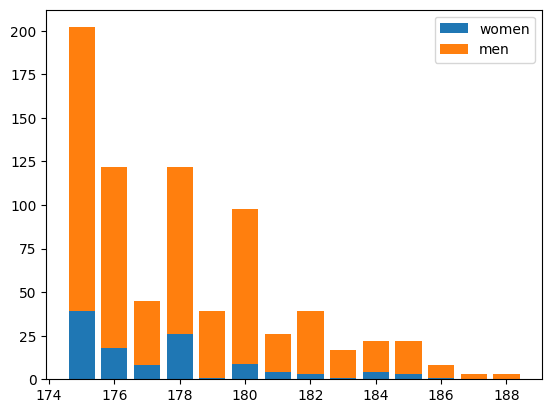

In [ ]:
women_heights = df.loc[(df['height'] >= 175) & (df['height'] < 190) & (df['gender'] == 1), 'height']
men_heights = df.loc[(df['height'] >= 175) & (df['height'] < 190) & (df['gender'] == 2), 'height']
x_vals1, y_vals1 = np.unique(women_heights, return_counts=True)
x_vals2, y_vals2 = np.unique(men_heights, return_counts=True)

men_bottoms = []
for i, bin in enumerate(x_vals2):
    bottom = 0
    if bin in x_vals1:
        idx = x_vals1.tolist().index(bin)
        bottom = y_vals1[idx]
    men_bottoms.append(bottom)

plt.bar(x_vals1, y_vals1)
plt.bar(x_vals2, y_vals2, bottom=men_bottoms)
plt.legend(['women', 'men'])

plt.show()

### Question 4: Boxy plots
Another method to show how numeric data is distributed, its spread, and skewness is to use box plots. Box plots also help to detect outliers—data points that are significantly different from other observations.

Plot the box plots for the weights of the two groups of people: one for those diagnosed with cardiovascular disease (cardio = 1) and one for those not diagnosed with the disease (cardio = 0).

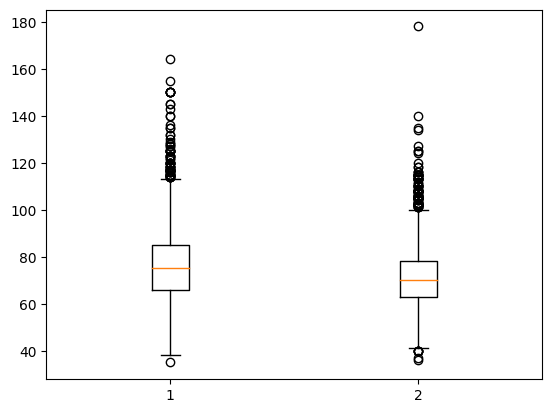

In [ ]:
diseased = df.loc[df['cardio'] == 1]
healthy = df.loc[df['cardio'] == 0]

plt.boxplot([diseased['weight'], healthy['weight']])

plt.show()

### Question 5: Turkish inliers

Delete the outliers using Turkey Method and draw the plots again.


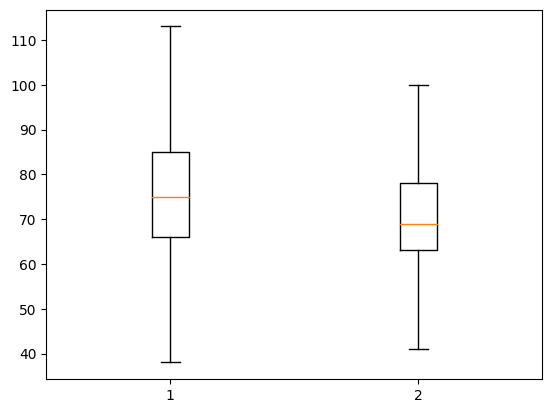

In [ ]:
def get_inliers(df, col):
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    mask = (df[col] < q3 + 1.5 * iqr) & (df[col] > q1 - 1.5 * iqr)
    return df[mask]

diseased_inliers = get_inliers(diseased, 'weight')
healthy_inliers = get_inliers(healthy, 'weight')

plt.boxplot([diseased_inliers['weight'], healthy_inliers['weight']])
plt.show()

### Question 6: Violin concerto in E major

Every chart has its own pros and cons and that is why there are a lot of charts, each used for a particular purpose.


Boxplots just tell us about the spread of the values and do not convey information about the density of the data along different values and  variances. To overcome this issue, violion plots are introduced. Look at the picture below and note how two data have different distributions while having the same boxplots:

<img src="./boxplots.jpg" width="500"/>

Now add violion plots to the previous plots:

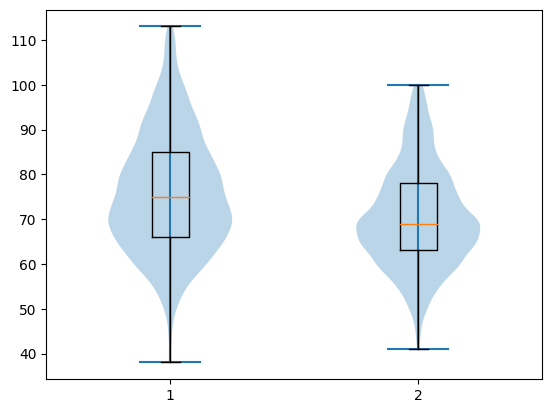

In [ ]:
plt.violinplot([diseased_inliers['weight'], healthy_inliers['weight']])
plt.boxplot([diseased_inliers['weight'], healthy_inliers['weight']])
plt.show()

### Question 7: Smoking Kills

Create a pie chart for patients diagnosed with cardiovascular disease, showing the number of smokers and non-smokers. Use labels and the `autopct` parameter to indicate the percentage of each group. Also, use the `explode` option to offset the slice representing smoking patients.

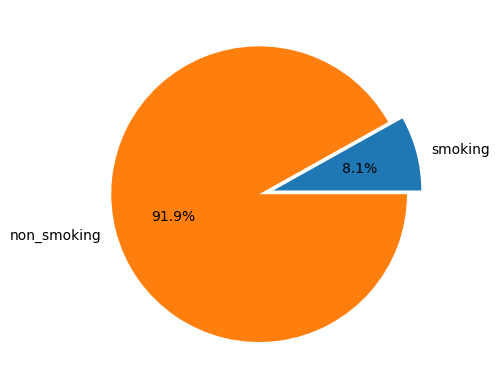

In [ ]:
cardio = df[df['cardio'] == 1]
smoking = len(cardio[cardio['smoke'] == 1])
non_smoking = len(cardio[cardio['smoke'] == 0])

plt.pie([smoking, non_smoking], labels=['smoking', 'non_smoking'], autopct='%1.1f%%', explode=(0.1, 0))
plt.show()

### Question 8: Multiple subplots

Create subplots for different cholesterol levels of patients, and plot pie charts showing the number of patients diagnosed with cardiovascular disease versus healthy individuals in each subplot, side by side. Use titles to indicate cholesterol levels.

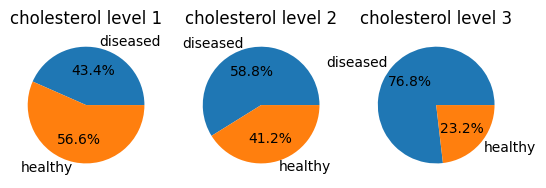

In [ ]:
chol_groups = np.unique(df['cholesterol'])
for i, group in enumerate(chol_groups):
    group_df = df[df['cholesterol'] == group]
    n_diseased = len(group_df[group_df['cardio'] == 1])
    n_healthy = len(group_df) - n_diseased
    plt.subplot(1, 3, i+1)
    plt.title(f'cholesterol level {group}')
    plt.pie([n_diseased, n_healthy], labels=['diseased', 'healthy'], autopct='%1.1f%%')


### Question 9: Bloody scatters

Filter patients with diastolic (`ap_hi` column) and systolic (`ap_lo` column) blood pressures less than 200 and greater than 20. Then, draw a scatter plot of diastolic versus systolic blood pressures for these patients. Create a legend with unique colors for each **cholesterol** group.

You can also experiment with other colormaps by providing the `cmap` parameter to the scatter function (e.g., plasma, inferno, magma, etc.).

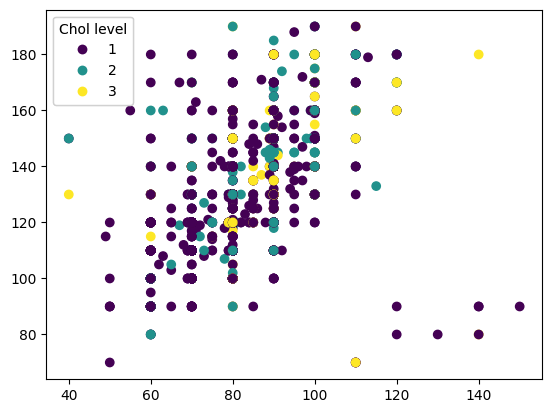

In [ ]:
filtered = df.loc[(df['ap_hi'] < 200) & (df['ap_hi'] > 20) & (df['ap_lo'] > 20) & (df['ap_lo'] < 200)]

fig, ax = plt.subplots()



scatter = ax.scatter(filtered['ap_lo'], filtered['ap_hi'], c=filtered['cholesterol'])
legend1 = ax.legend(*scatter.legend_elements(), title="Chol level")
ax.add_artist(legend1)

plt.show()


### Question 10: Hot heatmaps
One of the important steps in data analysis is to determine the relationship between different variables in the data (e.g., whether the height and weight of people are correlated and to what extent). To represent the correlation between variables, heatmaps are one of the most widely used graphic representations.


Now, calculate the correlation between the variables (columns) of the dataset and represent it with a heatmap implemented in Matplotlib. Use proper annotations and labeling to show the amount of correlation between any pair of variables.

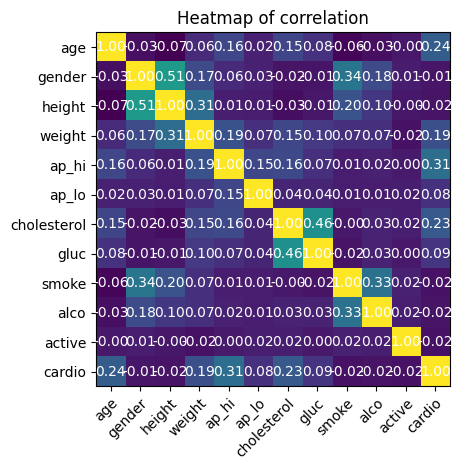

In [15]:
corr = df.corr().to_numpy()

fig, ax = plt.subplots()
im = ax.imshow(corr)

ax.set_xticks(np.arange(len(corr)), labels=df.columns.to_list())
ax.set_yticks(np.arange(len(corr)), labels=df.columns.to_list())

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(corr)):
    for j in range(len(corr)):
        text = ax.text(j, i, format(corr[i, j], '.2f'),
                       ha="center", va="center", color="w")

ax.set_title("Heatmap of correlation")
fig.tight_layout()
plt.show()

## Seaborn
Seaborn is another widely used Python library for data visualization. It is built on top of Matplotlib and integrates closely with Pandas data structures. Seaborn provides a simple and aesthetically pleasing graphing API with minimal code.

Use Seaborn for the next questions.

### Question 1: Smooth stacking
Now, we are going to see how much Seaborn can make visualization easier for us compared to Matplotlib. We want to draw the same stacked bar chart for patients' heights from the previous section in one line of code!


Plot the histogram for tall patients (175 ≤ height < 190) using the displot() function. Use the hue parameter with 'gender' to separate them.


You can also try different palettes by providing the palette parameter with a value (e.g., "flare," "crest," "magma," "viridis," "icefire," ...).

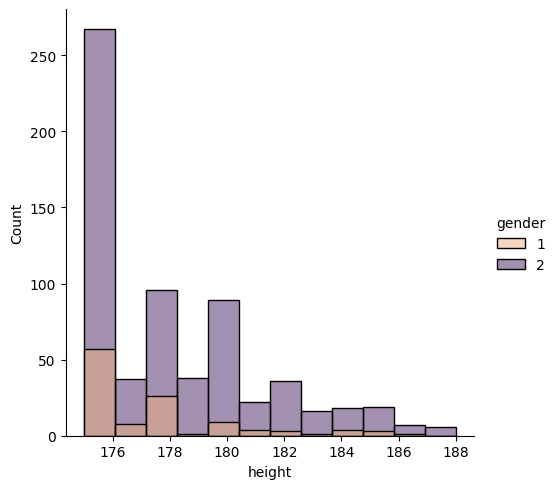

In [ ]:
tall_patients = df[(df['height'] >= 175) & (df['height'] < 190)]

sns.displot(tall_patients, x='height', hue='gender', palette='flare')

### Question 2: Tidy boxing

Plot the box plot of healthy and diseased patients' weights by providing the `x`, `y`, and `hue` parameters with appropriate values.

<Axes: xlabel='cardio', ylabel='weight'>

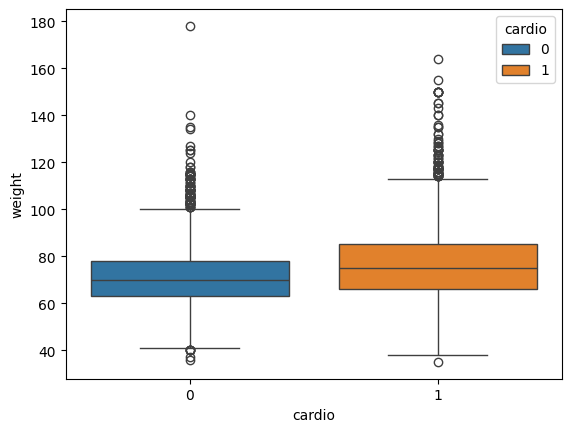

In [ ]:
sns.boxplot(df, x= 'cardio',y='weight', hue='cardio')

### Question 3: Cats & Plots

Draw a horizontal count plot for patients diagnosed with cardiovascular disease, grouped by different cholesterol levels. Separate each group by glucose levels.

**Hint:** Search for the `catplot` function in Seaborn.

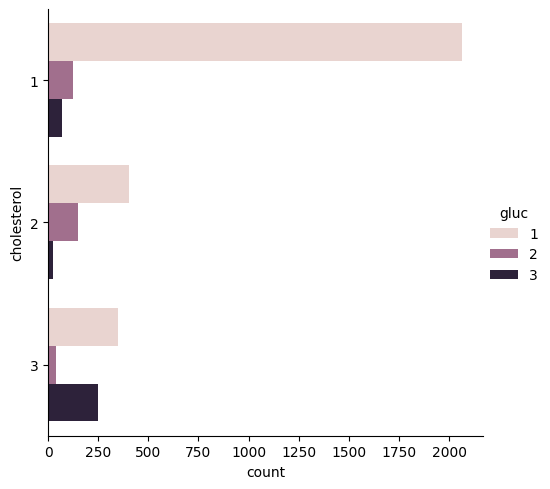

In [ ]:
sns.catplot(df[df['cardio'] == 1], y='cholesterol', hue='gluc', kind='count')

### Question 4: Cool heatmaps!

Draw the heatmap of the correlations between the variables in the dataset using Seaborn. Provide annotations with 2 decimal places of accuracy.

<Axes: >

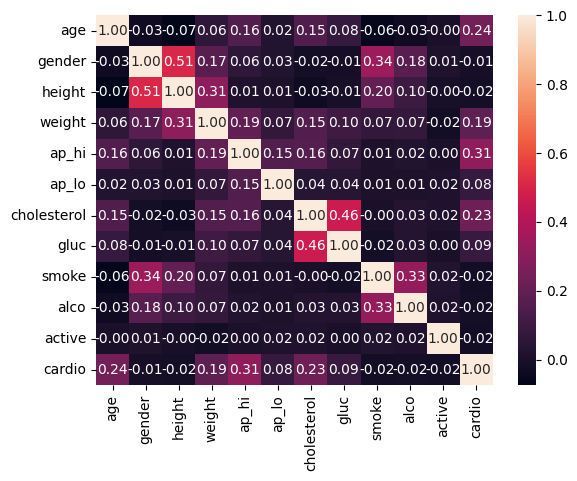

In [ ]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt=".2f")

## Plotly
Plotly is another visualization library besides Matplotlib and Seaborn that offers highly interactive and dynamic visualizations, making it ideal for creating dashboards, animated charts, and complex plots with detailed hover information.


Unlike Matplotlib and Seaborn, which are primarily static, Plotly allows users to zoom, pan, and hover over data points, providing a more engaging and intuitive experience, particularly for web-based applications.


Now load `eccomerce_data.csv` as a pandas dataframe and show its top 7 rows.

In [ ]:
df = pd.read_csv('ecommerce_data.csv')
df.head(7)

,Customer ID,Age,Gender,Country,Product Category,Revenue,Purchase Date,Time on Site (minutes),Pages Visited
0,1,56,Female,UK,Home & Kitchen,122.290258,2023-01-01 00:00:00,32.095446,4
1,2,69,Male,USA,Books,34.944360,2023-01-01 01:00:00,26.138920,8
2,3,46,Male,France,Books,332.800076,2023-01-01 02:00:00,8.711912,2
3,4,32,Female,France,Toys,196.892645,2023-01-01 03:00:00,53.309649,9
4,5,60,Male,Germany,Toys,434.891960,2023-01-01 04:00:00,27.537294,14
5,6,25,Male,Canada,Sports,247.140755,2023-01-01 05:00:00,12.482728,9
6,7,38,Female,USA,Sports,484.732845,2023-01-01 06:00:00,22.697802,16


### Question 1: Bubble chart

Create an interactive bubble chart to visualize the relationship between Time on Site (minutes) and Revenue. The size of the bubbles should represent the number of Pages Visited, and the color should indicate the Product Category. Add hover text to show Customer ID, Age, and Country.

In [ ]:
fig = px.scatter(
    df,
    x='Time on Site (minutes)',
    y='Revenue',
    size='Pages Visited',
    color='Product Category',
    hover_data=['Customer ID', 'Age', 'Country'],
    title='Time on Site vs Revenue by Product Category'
)

fig.show()

### Question 2: Pie Chart of Revenue Distribution
Create a pie chart to visualize the distribution of total Revenue across different Product Categories. Add hover text to display the percentage of total revenue and the actual revenue amount for each category.

In [ ]:
category_revenue = df.groupby('Product Category').agg({
    'Revenue': 'sum'
}).reset_index()

fig = px.pie(
    category_revenue,
    names='Product Category',
    values='Revenue',
    title='Revenue Distribution by Product Category',
    hover_data={'Revenue': ':.2f'},
    labels={'Revenue': 'Total Revenue'}
)

fig.show()

### Question 3: Charts with animations
Create an animated bar chart to visualize the Revenue generated in each Product Category over time (Purchase Date). The bars should be grouped by Gender, and the animation should show the change in revenue on a daily basis. Add hover text to display Total Revenue for each category and gender.

In [ ]:
df['Day'] = pd.to_datetime(df['Purchase Date']).dt.to_period('D')

monthly_revenue = df.groupby(['Day', 'Product Category', 'Gender']).agg({
    'Revenue': 'sum'
}).reset_index()

fig = px.bar(
    monthly_revenue,
    x='Product Category',
    y='Revenue',
    color='Gender',
    animation_frame='Day',
    hover_data={'Revenue': ':.2f'},
    title='Monthly Revenue by Product Category and Gender',

)

fig.show(frame_duration = 5000, transition_duration = 5000)